## Introductions to Convolutional Neural Networks (CNNs)

Introduction to the convolution operation

In [63]:
# 1 D Convolution

import numpy as np

h = [1,2,3]
x = [4,5,6]
 

y = np.convolve(x,h,"full")
y  


array([ 4, 13, 28, 27, 18])

Sliding x window over h:<br/>
$
4 = 1*4
$<br/>
$
13 = 1 * 5 + 2 * 4
$<br/>
$
28 = 1 * 6 + 2 * 5 + 3 * 4
$<br/>
$27 = 2 * 6 + 3 * 5
$<br/>
$
18 = 3 * 6
$<br/>

In [64]:
#edge detection
h = [1,-1]
x = [0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0]
 

y = np.convolve(x,h,"full")
y  

array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0])

In [4]:
#DOWNLOAD GOOGLE IMAGE

#use wget to download a local copy of google logo
!wget https://www.google.com.au/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png --output-document google.png


--2017-09-23 11:11:16--  https://www.google.com.au/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
Resolving www.google.com.au (www.google.com.au)... 216.58.200.99
Connecting to www.google.com.au (www.google.com.au)|216.58.200.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5969 (5.8K) [image/png]
Saving to: 'google.png’

google.png          100%[===================>]   5.83K  --.-KB/s    in 0.003s  

2017-09-23 11:11:17 (1.89 MB/s) - 'google.png’ saved [5969/5969]



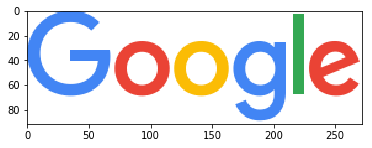

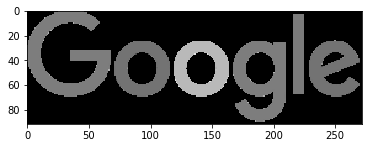

In [11]:
import matplotlib.pyplot as plt
from scipy import signal
from PIL import Image

fname = 'google.png'
image = Image.open(fname)
imagedata = np.asarray(image)

plt.imshow(image)
plt.show()

imagedata = np.asarray(image.convert("L"))


plt.imshow(imagedata,cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [13]:
# Horizontal Edge detector
kernel_horizontal = np.array([[ 0, 1, -1,0]]) 

convolved_horz = signal.convolve2d(imagedata, kernel_horizontal, mode='same', boundary='symm')

In [14]:
# Vertical Edge detector
kernel_vertical = np.array([
                        [ 0],
                        [ 1],
                        [ -1],
                        [ 0]
                        ]) 

convolved_vert = signal.convolve2d(imagedata, kernel_vertical, mode='same', boundary='symm')

$
kernel=
\begin{bmatrix}
     0 & 1 & 0     \\
     1 & -4 & 1     \\
     0 & 1 & 0
\end{bmatrix}
\\
$ 

In [15]:
# Both
kernel_both = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 

convolved_both = signal.convolve2d(imagedata, kernel_both, mode='same', boundary='symm')



(92, 272)

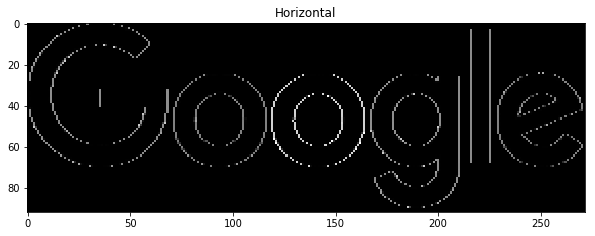

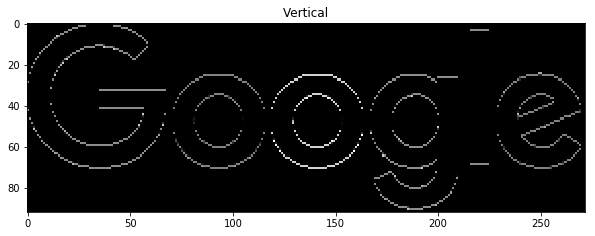

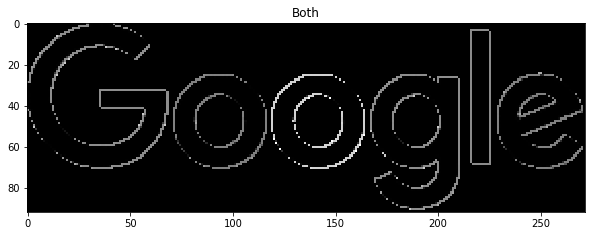

In [49]:
%matplotlib inline

fig,aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(convolved_horz), cmap='gray')
plt.title('Horizontal')


fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(convolved_vert), cmap='gray')
plt.title('Vertical')


fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(convolved_both), cmap='gray')
plt.title('Both')
convolved_both.shape

In [61]:
#PERFORM THE SAME IN TENSORFLOW

import tensorflow as tf

#Building graph

#3x3 filter (4D tensor = [3,3,1,1] = [width, height, channels, number of filters])
#92x272 image (4D tensor = [1,92,272,1] = [batch size, width, height, number of channels]

kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 

filter = tf.reshape(kernel.astype(np.float32),[3,3,1,1])
input = tf.reshape(imagedata.astype(np.float32),[1,92,272,1])



op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    result = sess.run(op)
    print(result.shape)
    output = np.reshape(result,[92,272])
    print(output.shape)


(1, 92, 272, 1)
(92, 272)


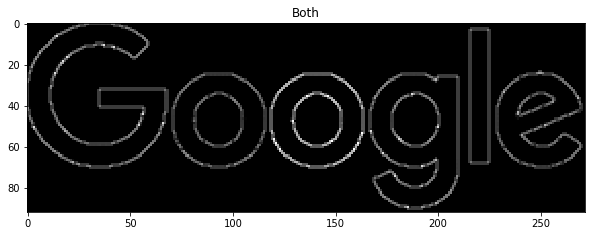

In [62]:

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(g), cmap='gray')
plt.title('Tensorflow')